In [15]:
from overturemaps import core
import geopandas as gpd

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [9]:
# Manhattan
bbox = (-74.047285, 40.682944, -73.9067, 40.8776)

# olympia
bbox = (-123.0660, 47.0290, -122.8500, 47.1000)

# Pennsylvania
bbox = (-80.5199, 39.7198, -74.6895, 42.2696)




In [ ]:
# download the data for segments (transportation)
# check out https://docs.overturemaps.org/blog/2024/05/16/land-cover/
gdf = core.geodataframe("land_cover", bbox=bbox)
gdf.head(5)


,id,geometry,bbox,version,sources,subtype,cartography
0,08b2795602c59fff0005d3229b0b983b,"POLYGON ((-82.30821 26.86705, -82.29025 26.867...","{'xmin': -163.012939453125, 'xmax': -55.753906...",0,"[{'property': '', 'dataset': 'ESA WorldCover',...",forest,"{'min_zoom': 0, 'max_zoom': 7, 'sort_key': 2}"
1,08b2a80193b61fff0005d336dc6e3db4,"POLYGON ((-80.41304 39.7178, -80.41153 39.7180...","{'xmin': -80.41361999511719, 'xmax': -80.39071...",0,"[{'property': '', 'dataset': 'ESA WorldCover',...",grass,"{'min_zoom': 8, 'max_zoom': 15, 'sort_key': 5}"
2,08b2a801835b2fff0005dc748e3c53a2,"POLYGON ((-80.35781 39.7103, -80.35735 39.7107...","{'xmin': -80.36103057861328, 'xmax': -80.35362...",0,"[{'property': '', 'dataset': 'ESA WorldCover',...",grass,"{'min_zoom': 8, 'max_zoom': 15, 'sort_key': 5}"
3,08b2a801aacd2fff0005d35c73a301a0,"POLYGON ((-80.29272 39.71889, -80.29236 39.718...","{'xmin': -80.29492950439453, 'xmax': -80.28871...",0,"[{'property': '', 'dataset': 'ESA WorldCover',...",grass,"{'min_zoom': 8, 'max_zoom': 15, 'sort_key': 5}"
4,08b2a8018536afff0005d7a40d0b2099,"POLYGON ((-80.29454 39.72397, -80.29403 39.723...","{'xmin': -80.29470825195312, 'xmax': -80.29296...",0,"[{'property': '', 'dataset': 'ESA WorldCover',...",grass,"{'min_zoom': 8, 'max_zoom': 15, 'sort_key': 5}"


In [11]:
# filter for higher resolution land_cover features
gdf = gdf[gdf.cartography.apply(lambda x: x['min_zoom'] == 8)]

In [12]:
# Convert RGB values to Hex
def rgb_to_hex(rgb):
    return "#{:02x}{:02x}{:02x}".format(*rgb)

# create color map for land_cover subtypes, loosely based on natural-color palette: https://www.shadedrelief.com/shelton/c.html
color_map = {
    "urban": [167, 162, 186],
    "forest": [134, 178, 137],
    "barren": [245, 237, 213],
    "shrub": [239, 218, 182],
    "grass": [254, 239, 173],
    "crop": [222, 223, 154],
    "wetland": [158, 207, 195],
    "mangrove": [83, 171, 128],
    "moss": [250, 230, 160],
    "snow": [255, 255, 255],
}

# Convert the color_map to Hex
color_map_hex = {k: rgb_to_hex(v) for k, v in color_map.items()}

# Assume gdf has a 'subtype' column
# Map the colors to a new column
gdf['color'] = gdf['subtype'].map(color_map_hex)

<Axes: >

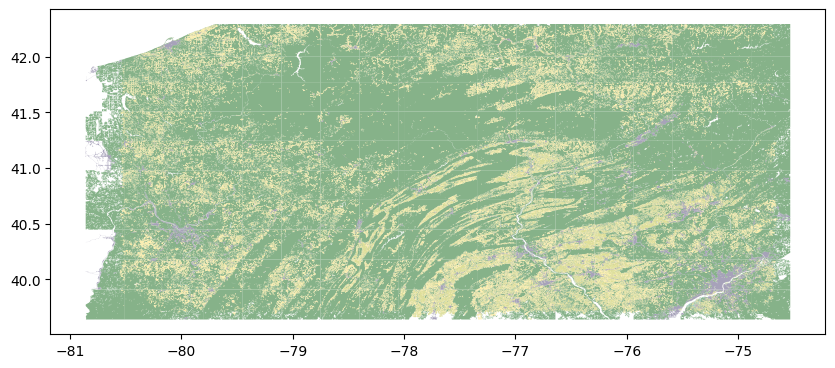

In [13]:
# Plot using the color column
gdf.plot(color=gdf['color'], figsize=(10, 6), legend=True)

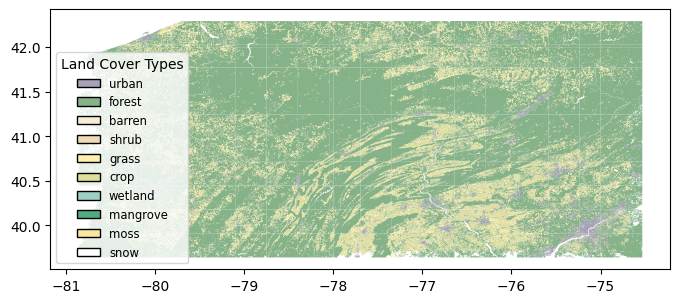

In [16]:
# Create the plot
fig, ax = plt.subplots(figsize=(8, 10))
gdf.plot(color=gdf['color'], ax=ax)

# Create a custom legend
legend_elements = [
    Patch(facecolor=hex_color, edgecolor='black', label=label)
    for label, hex_color in color_map_hex.items()
]

# Add the legend to the plot
ax.legend(handles=legend_elements, title="Land Cover Types", loc="lower left", fontsize='small')

# Display the plot
plt.show()